In [ ]:
x = np.linspace(0, np.pi, 200)
y = np.sin(x)
block_width = np.pi / 10
start_index = int(np.round(4 * 200 / np.pi * block_width))
end_index = int(np.round(5 * 200 / np.pi * block_width))
x_block = x[start_index:end_index]
y_block = y[start_index:end_index]

In [ ]:
import math
def plot(onetime, modifier, a):
  V = 12
  R = 2
  L = .3
  tone = onetime
  ttwo = 1 - tone
  t_charging = np.linspace(0, tone, 50)
  t_discharging = np.linspace(0, ttwo, 50)
  I_charging = [charging(ti, V, R, L) for ti in t_charging]
  I_discharging = [discharging(ti, V, R, L) for ti in t_discharging]
  t_combined = np.concatenate((t_charging, t_discharging + t_charging[-1]))
  I_combined = np.concatenate((I_charging, I_discharging))
  scaled_t_combined = ((t_combined / t_combined[-1]) * (x_block[-1] - x_block[0]) + x_block[0])*12
  scaled_I_combined = (1.5*(I_combined / max(I_combined)))*12
  adjust = scaled_I_combined[50]-scaled_I_combined[49]
  for i in range(50,100):
    scaled_I_combined[i] = scaled_I_combined[i]-adjust
  plt.plot(t_combined + modifier, (0.25*(scaled_I_combined))+a)
  c = a + 0.25*(scaled_I_combined[99])
  return (c)

In [ ]:
def plot_two(arr):
  aaaaaa = plot(arr[0], 0, 0)
  bbbbbb = plot(arr[1], 1, aaaaaa)
  cccccc = plot(arr[2], 2, bbbbbb)
  dddddd = plot(arr[3], 3, cccccc)
  eeeeee = plot(arr[4], 4, dddddd)
  ffffff = plot(arr[5], 5, eeeeee)
  gggggg = plot(arr[6], 6, ffffff)
  hhhhhh = plot(arr[7], 7, gggggg)
  iiiiii = plot(arr[8], 8, hhhhhh)
  jjjjjj = plot(arr[9], 9, iiiiii)

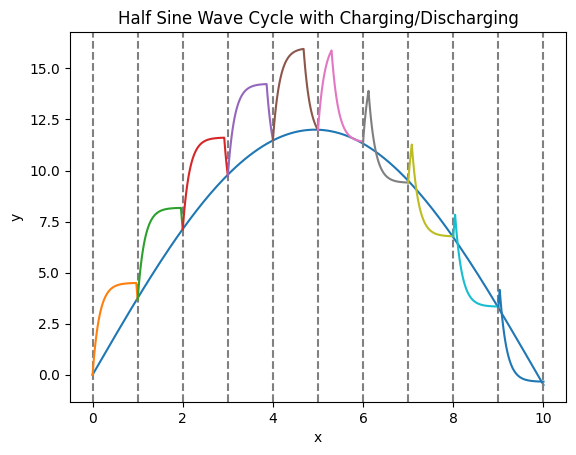

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0, 10, 200)
y = np.sin(x/np.pi)*12
plt.plot(x, y)
for i in np.linspace(0, 10, 11):
    plt.axvline(x=i, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('y')
def charging(t, V, R, L):
  return (V / R) * (1 - math.exp((-R * t) / L))
def discharging(t, V, R, L):
  return (V / R) * math.exp((-R * t) / L)
mmmmmm = [0.97, 0.96, 0.92, 0.86, 0.68, 0.3, 0.12, 0.08, 0.04, 0.03]
plot_two(mmmmmm)
plt.title('Half Sine Wave Cycle with Charging/Discharging')
plt.show()

In [ ]:
def change(onetime, modifier, a):
  V = 12
  R = 2
  L = .3
  tone = onetime
  ttwo = 1 - tone
  t_charging = np.linspace(0, tone, 50)
  t_discharging = np.linspace(0, ttwo, 50)
  I_charging = [charging(ti, V, R, L) for ti in t_charging]
  I_discharging = [discharging(ti, V, R, L) for ti in t_discharging]
  t_combined = np.concatenate((t_charging, t_discharging + t_charging[-1]))
  I_combined = np.concatenate((I_charging, I_discharging))
  scaled_t_combined = ((t_combined / t_combined[-1]) * (x_block[-1] - x_block[0]) + x_block[0])*12
  scaled_I_combined = (1.5*(I_combined / max(I_combined)))*12
  adjust = scaled_I_combined[50]-scaled_I_combined[49]
  for i in range(50,100):
    scaled_I_combined[i] = scaled_I_combined[i]-adjust
  b = 0.25*(scaled_I_combined[99])
  return (b)

In [ ]:
def get_coefficients(func, k):
  changes = [0] * 10
  total = [0] * 10
  for i in range(10):
    index_one = k*(i+1)
    index_two = k*(i)
    changes[i] = func[index_one] - func[index_two]
    if (i == 0):
      total[i] = changes[i]
    else:
      total[i] = total[i-1] + changes[i]
  coeffs = [0] * 10
  for i in range(10):
    closest = 100;
    for j in range(100):
      thing = change(j/100, i, changes[i])
      thingd = abs(thing - changes[i])
      closd = abs(closest - changes[i])
      if math.isclose(thing, changes[i], rel_tol=0.1):
        closest = j/100
        break
    coeffs[i] = closest
  return coeffs

[0.96, 0.95, 0.91, 0.84, 0.68, 0.27, 0.12, 0.06, 0.03, 0.02]


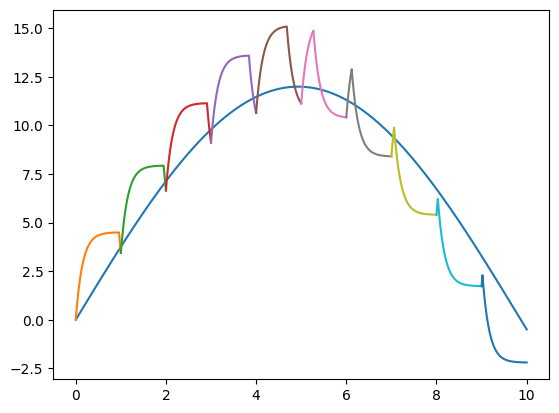

In [ ]:
n = 201
x = np.linspace(0, 10, n)
y = np.sin(x/np.pi)*12
plt.plot(x, y)
k = (n-1)//10
s = get_coefficients(y, (n-1)//10)
print(s)
plot_two(s)

[0.28, 0.13, 0.06, 0.03, 0.02, 0.02, 0.03, 0.07, 0.14, 0.32]


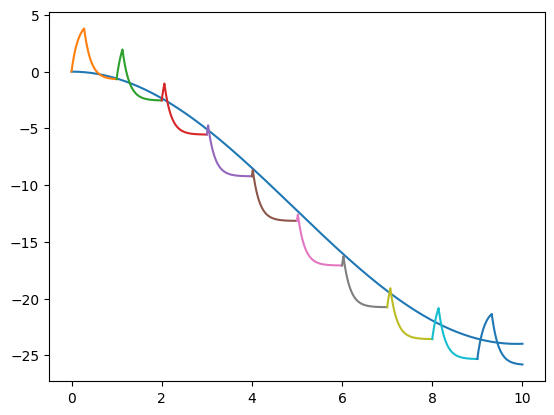

In [ ]:
n = 201
x = np.linspace(0, 10, n)
y = np.cos(x/np.pi)*12 - 12
plt.plot(x, y)
k = (n-1)//10
s = get_coefficients(y, (n-1)//10)
print(s)
plot_two(s)

[0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93]


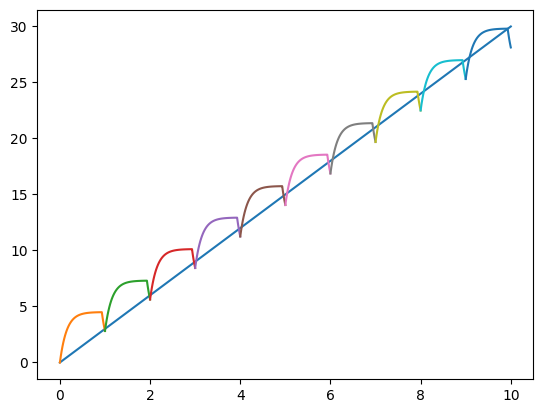

In [ ]:
n = 201
x = np.linspace(0, 10, n)
y = 3*x
plt.plot(x, y)
k = (n-1)//10
s = get_coefficients(y, (n-1)//10)
print(s)
plot_two(s)

[0.59, 0.7, 0.77, 0.82, 0.85, 0.88, 0.91, 0.93, 0.95, 0.96]


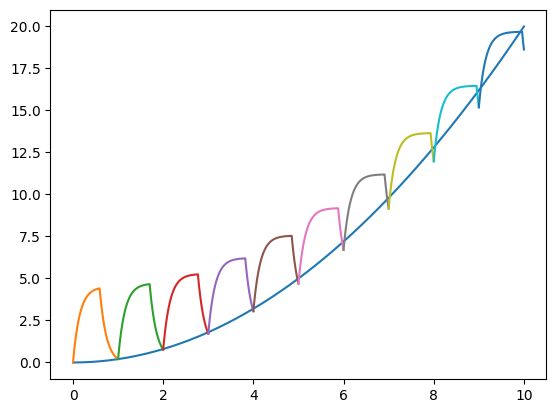

In [ ]:
n = 201
x = np.linspace(0, 10, n)
y = 0.2*x**2
plt.plot(x, y)
k = (n-1)//10
s = get_coefficients(y, (n-1)//10)
print(s)
plot_two(s)